In [113]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import folium
import plotly.express as px

In [44]:
pd.set_option('display.max_columns', None)

In [45]:
listings = pd.read_csv('/Users/svolkova/Desktop/productAnalytic/projects/amsterdam_airbnb/listings.csv.gz', index_col = 'id')
listings.head(5)

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27886,https://www.airbnb.com/rooms/27886,20250609011745,2025-06-17,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100%,98%,t,https://a0.muscache.com/im/users/97647/profile...,https://a0.muscache.com/im/users/97647/profile...,Westelijke Eilanden,1.0,1.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,NaN,52.38761,4.89188,Private room in houseboat,Private room,2,1.5,1.5 baths,1.0,1.0,"[""Coffee maker: Nespresso"", ""Shampoo"", ""Paid s...",$132.00,3,356,3,3,30,30,3.0,30.0,NaN,t,0,0,0,53,2025-06-17,302,28,1,53,26,218,28776.0,2012-01-09,2025-06-11,4.92,4.90,4.94,4.95,4.92,4.90,4.78,0363 974D 4986 7411 88D8,f,1,0,1,0,1.85
28871,https://www.airbnb.com/rooms/28871,20250609011745,2025-06-17,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,Edwin,2010-05-13,"Amsterdam, Netherlands",Hi,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/9986b...,https://a0.muscache.com/im/pictures/user/9986b...,Amsterdam Centrum,2.0,2.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,NaN,52.36775,4.89092,Private room in rental unit,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Wifi"", ""Heating"", ""...",$78.00,2,730,1,2,730,730,2.0,730.0,NaN,t,1,2,4,130,2025-06-17,710,93,9,31,96,255,19890.0,2010-08-22,2025-06-16,4.88,4.90,4.87,4.94,4.94,4.94,4.84,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.93
29051,https://www.airbnb.com/rooms/29051,20250609011745,2025-06-17,city scrape,Comfortable single / double room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,Edwin,2010-05-13,"Amsterdam, Netherlands",Hi,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/9986b...,https://a0.muscache.com/im/pictures/user/9986b...,Amsterdam Centrum,2.0,2.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36584,4.89111,Private room in condo,Private 

In [46]:
listings.shape

(10168, 78)

In [47]:
cols = listings.columns.tolist()
print(cols)

['listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_36

In [48]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10168 entries, 27886 to 1438602403155395239
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   10168 non-null  object 
 1   scrape_id                                     10168 non-null  int64  
 2   last_scraped                                  10168 non-null  object 
 3   source                                        10168 non-null  object 
 4   name                                          10168 non-null  object 
 5   description                                   9859 non-null   object 
 6   neighborhood_overview                         5258 non-null   object 
 7   picture_url                                   10168 non-null  object 
 8   host_id                                       10168 non-null  int64  
 9   host_url                                      10

In [49]:
listings = listings.drop(columns=['neighbourhood_group_cleansed'])

In [50]:
listings_2 = pd.read_csv('/Users/svolkova/Desktop/productAnalytic/projects/amsterdam_airbnb/listings.csv', index_col = 'id')
cols2 = listings.columns.tolist()
print(cols2)

['listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'nu

In [51]:
c = list(set(cols2) - set(cols))
print(c)

[]


In [57]:
neighbour = pd.read_csv('/Users/svolkova/Desktop/productAnalytic/projects/amsterdam_airbnb/neighbourhoods.csv')
neighbour


,neighbourhood_group,neighbourhood
0,NaN,Bijlmer-Centrum
1,NaN,Bijlmer-Oost
2,NaN,Bos en Lommer
3,NaN,Buitenveldert - Zuidas
4,NaN,Centrum-Oost
5,NaN,Centrum-West
6,NaN,De Aker - Nieuw Sloten
7,NaN,De Baarsjes - Oud-West
8,NaN,De Pijp - Rivierenbuurt
9,NaN,Gaasperdam - Driemond


In [53]:
reviews = pd.read_csv('/Users/svolkova/Desktop/productAnalytic/projects/amsterdam_airbnb/reviews.csv.gz', index_col='id')
reviews.head(5)

,listing_id,date,reviewer_id,reviewer_name,comments
id,,,,,
4796982,1182656,2013-05-26,6511386,Karim,Marc was a very friendly guy. When we got to h...
4952124,1182656,2013-06-03,1409171,Tomas,Great. Very good location. Friendly host. Accu...
5014762,1182656,2013-06-07,6444385,Charles,Marc is an incredibly nice person and a gracio...
5073754,1182656,2013-06-10,3333785,Laura,Marc's apartment is a beautiful place located ...
5091378,1182656,2013-06-11,6608456,Sally,This was our first time using Airbnb and were ...


In [54]:
reviews.shape

(483680, 5)

In [55]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483680 entries, 4796982 to 1433979383777632974
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     483680 non-null  int64 
 1   date           483680 non-null  object
 2   reviewer_id    483680 non-null  int64 
 3   reviewer_name  483679 non-null  object
 4   comments       483650 non-null  object
dtypes: int64(2), object(3)
memory usage: 22.1+ MB


In [56]:
calendar = pd.read_csv('/Users/svolkova/Desktop/productAnalytic/projects/amsterdam_airbnb/calendar.csv.gz', parse_dates=['date'])
calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights


In [ ]:
# numbers of accommodation by neighbourhood    

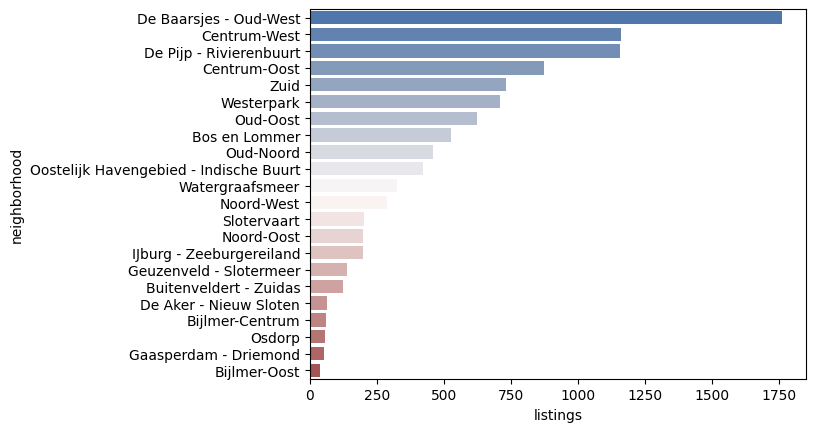

In [104]:
num_nei = listings['neighbourhood_cleansed'].value_counts().sort_values(ascending=False)
nei_df = num_nei.reset_index()
nei_df.columns = ['neighborhood', 'listings']
ax = sns.barplot(nei_df, y='neighborhood', x='listings', hue='neighborhood', palette='vlag', legend=False)


In [ ]:
nei_counts = listings.groupby('neighbourhood_cleansed')[['latitude', 'longitude']].mean()
nei_counts['count'] = listings.groupby('neighbourhood_cleansed').size()
nei_counts = nei_counts.reset_index()
# nei_counts

fig = px.scatter_mapbox(
    nei_counts,
    lat="latitude",
    lon="longitude",
    size='count', 
    size_max=30,
    hover_name="neighbourhood_cleansed",
    hover_data={'count' : True, 'latitude' : False, 'longitude' : False},
    zoom=11,
    height=600
)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [166]:
listings['price'] = listings['price'].replace('[$,€]', '', regex=True).astype(float)

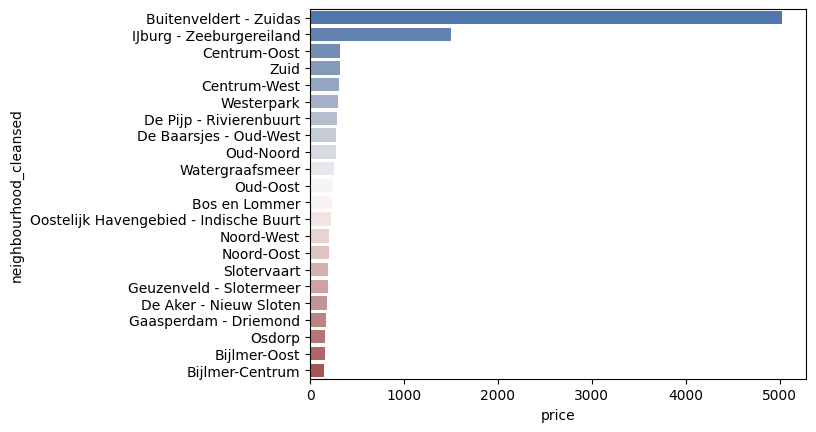

In [186]:
nei_counts['price'] = listings.groupby('neighbourhood_cleansed')['price'].mean().reset_index()['price'].round(2)
nei_counts = nei_counts.sort_values(by='price', ascending=False)

ax = sns.barplot(nei_counts, y='neighbourhood_cleansed', x='price', hue='neighbourhood_cleansed', palette='vlag', legend=False)

In [ ]:
# большой выброс на зауде и в айбурге, разобраться почему

In [196]:
fig = px.scatter_mapbox(
    nei_counts,
    lat="latitude",
    lon="longitude",
    size='price', 
    size_max=30,
    hover_name="neighbourhood_cleansed",
    hover_data={'price' : True, 'latitude' : False, 'longitude' : False},
    zoom=11,
    height=600
)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

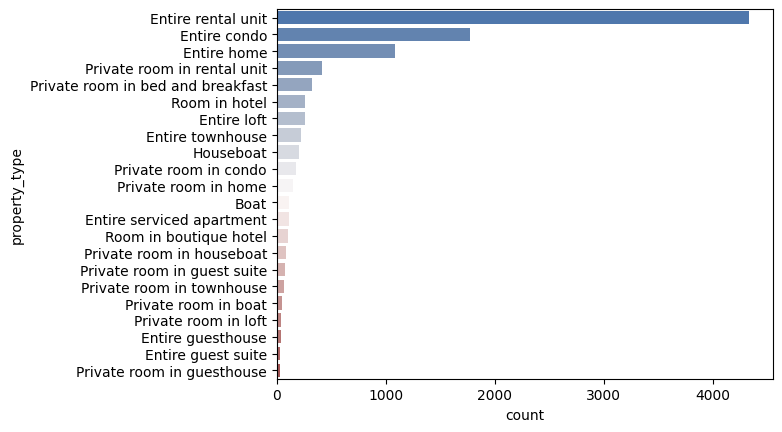

In [159]:
type_acc = listings['property_type'].value_counts()
type_acc_df = type_acc.reset_index()
# type_acc_df['count'].median()
# type_acc_df.shape
top_types = type_acc_df[type_acc_df['count'] > 20]

ax1 = sns.barplot(top_types, y='property_type', x='count', hue='property_type', palette='vlag', legend=False)